In [43]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_profiling

In [242]:
#Importing Data 
df_elec =pd.read_csv("Data/percentage-of-schools-with-electricity-2013-2016.csv")
#df_dropout= pd.read_csv("dropout.csv")
#df_enrollment = pd.read_csv("enrollment.csv")

In [94]:
df_enrollment['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)
df_elec['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)
df_dropout['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [319]:
df_elec.head(6)

State_UT     year  Primary_Only  Primary_with_U_Primary  \
0  Andaman & Nicobar Islands  2013-14         82.42                   96.05   
1  Andaman & Nicobar Islands  2014-15         80.72                   96.30   
2  Andaman & Nicobar Islands  2015-16         82.11                   97.62   
3             Andhra Pradesh  2013-14         87.66                   93.57   
4             Andhra Pradesh  2014-15         91.08                   94.70   
5             Andhra Pradesh  2015-16         91.65                   95.62   

   Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  U_Primary_With_Sec_HrSec  \
0                            100.00             0.0                    100.00   
1                            100.00           100.0                    100.00   
2                            100.00             0.0                    100.00   
3                             99.32           100.0                     67.48   
4                            100.00           100.0                     86.11   
5                            100.00           100.0                     90.23   

   Primary_with_U_Primary_Sec  U_Primary_With_Sec  Sec_Only  Sec_with_HrSec  \
0                      100.00                0.00      0.00          100.00   
1                      100.00                0.00      0.00          100.00   
2                      100.00                0.00      0.00          100.00   
3                       96.19               96.15     97.50          100.00   
4                       97.60               97.11     93.55           83.33   
5                       97.09               97.58     91.30          100.00   

   HrSec_Only  All Schools  
0        0.00        88.86  
1        0.00        88.89  
2        0.00        90.10  
3       91.27        90.34  
4       93.21        92.76  
5       95.80        93.50

In [6]:
len(df_elec["State_UT"].unique())

37

In [250]:
states =df_elec["State_UT"].unique().tolist()

In [299]:
#Function to calculate mean of three years of the total percentage of availability of electricity across the school levels
def mean_elec(df):
    means=[]
    for i in states:
        mean=np.mean(df_elec[df_elec["State_UT"]==i]["All Schools"]) 
        means.append(mean)
       
   
    return means

mean_elec=mean_elec(df_elec)

In [259]:
df_elec_all_schools= pd.DataFrame(states,columns=["State_UT"])

In [294]:
df_elec_all_schools["All_schools_mean"]=mean_elec

Text(0.5, 0.98, 'Mean total Percentage of Electricity for all states')

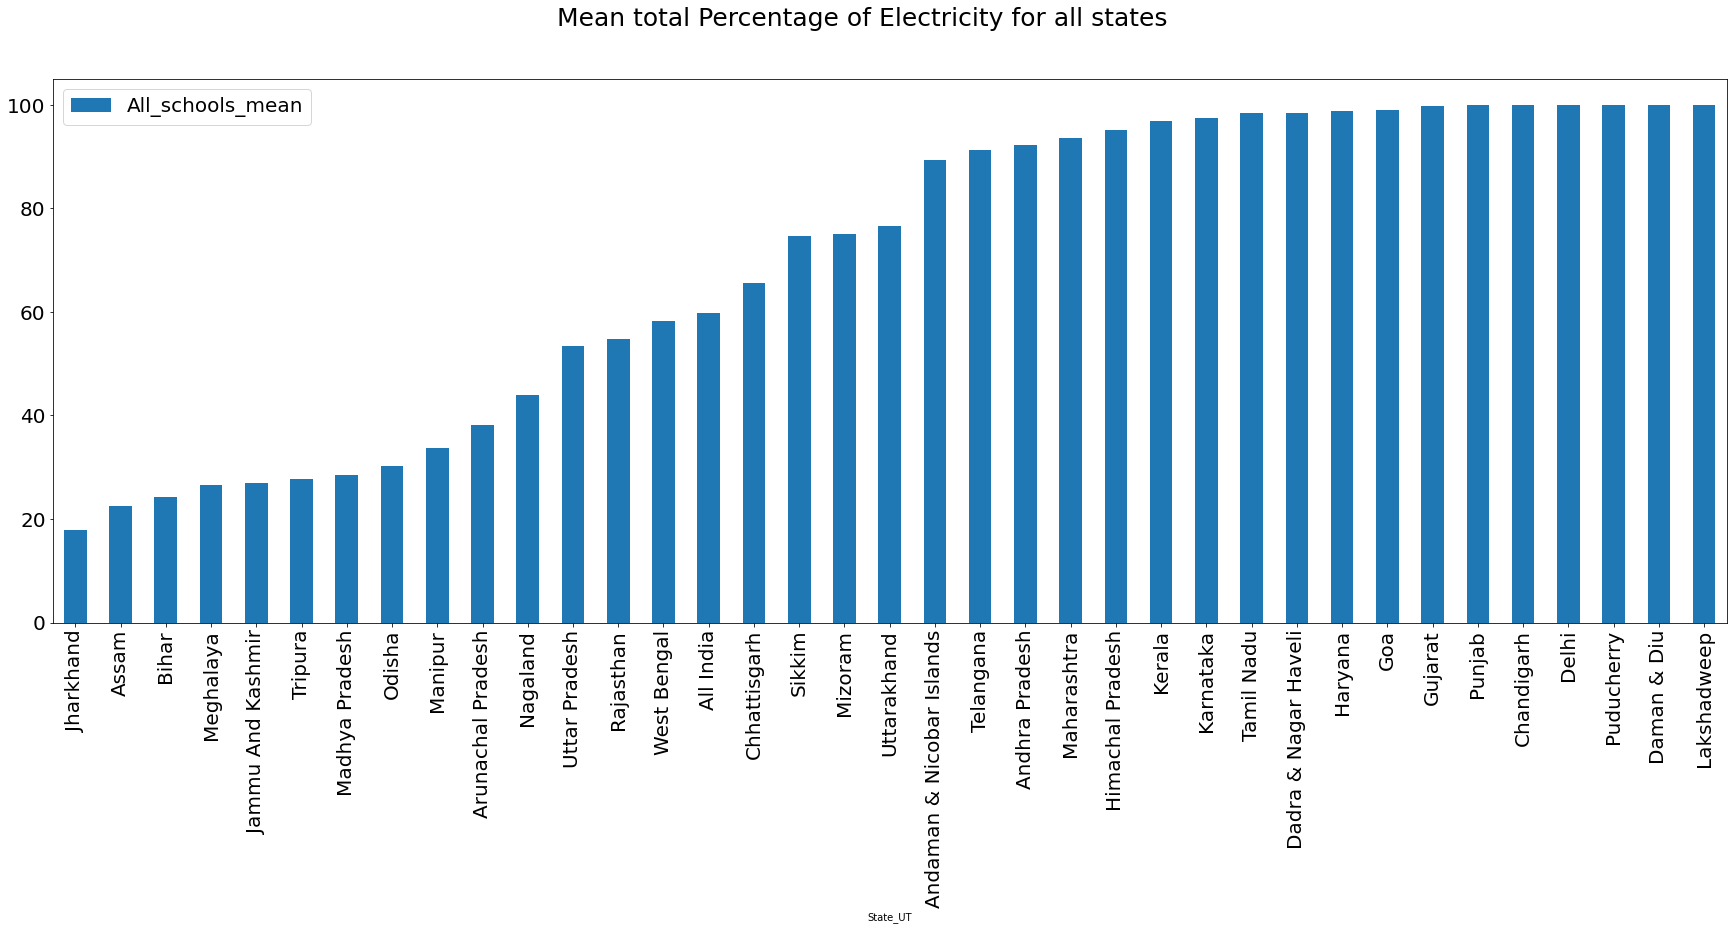

In [320]:
df_elec_all_schools.set_index("State_UT").sort_values(by="All_schools_mean").plot(kind="bar",figsize=(30,10), fontsize=20)
plt.legend(loc=2,prop={'size': 20})
plt.gcf().suptitle("Mean total Percentage of Electricity for all states",fontsize=25)

In [318]:
df_elec_all_schools.set_index("State_UT").sort_values(by="All_schools_mean").head(10) #10 states with the lowest availability of electricity

All_schools_mean
State_UT                           
Jharkhand                 17.926667
Assam                     22.446667
Bihar                     24.320000
Meghalaya                 26.583333
Jammu And Kashmir         26.943333
Tripura                   27.763333
Madhya Pradesh            28.453333
Odisha                    30.213333
Manipur                   33.633333
Arunachal Pradesh         38.163333

In [7]:
all_df=df_elec[df_elec["State_UT"]=="All India"] #getting the All india stats from the columns

In [8]:
all_df.head()

State_UT     year  Primary_Only  Primary_with_U_Primary  \
107  All India  2013-14         46.38                   69.56   
108  All India  2014-15         49.63                   73.26   
109  All India  2015-16         52.40                   76.44   

     Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  \
107                             94.92           45.97   
108                             95.27           48.33   
109                             94.81           49.86   

     U_Primary_With_Sec_HrSec  Primary_with_U_Primary_Sec  U_Primary_With_Sec  \
107                     93.72                       83.12               86.84   
108                     94.81                       84.03               89.14   
109                     94.48                       88.10               90.82   

     Sec_Only  Sec_with_HrSec.  HrSec_Only  All Schools  
107     75.08            82.88       91.01        56.78  
108     77.55            83.85       92.67        60.01  
109     81.50            86.85       92.86        62.81

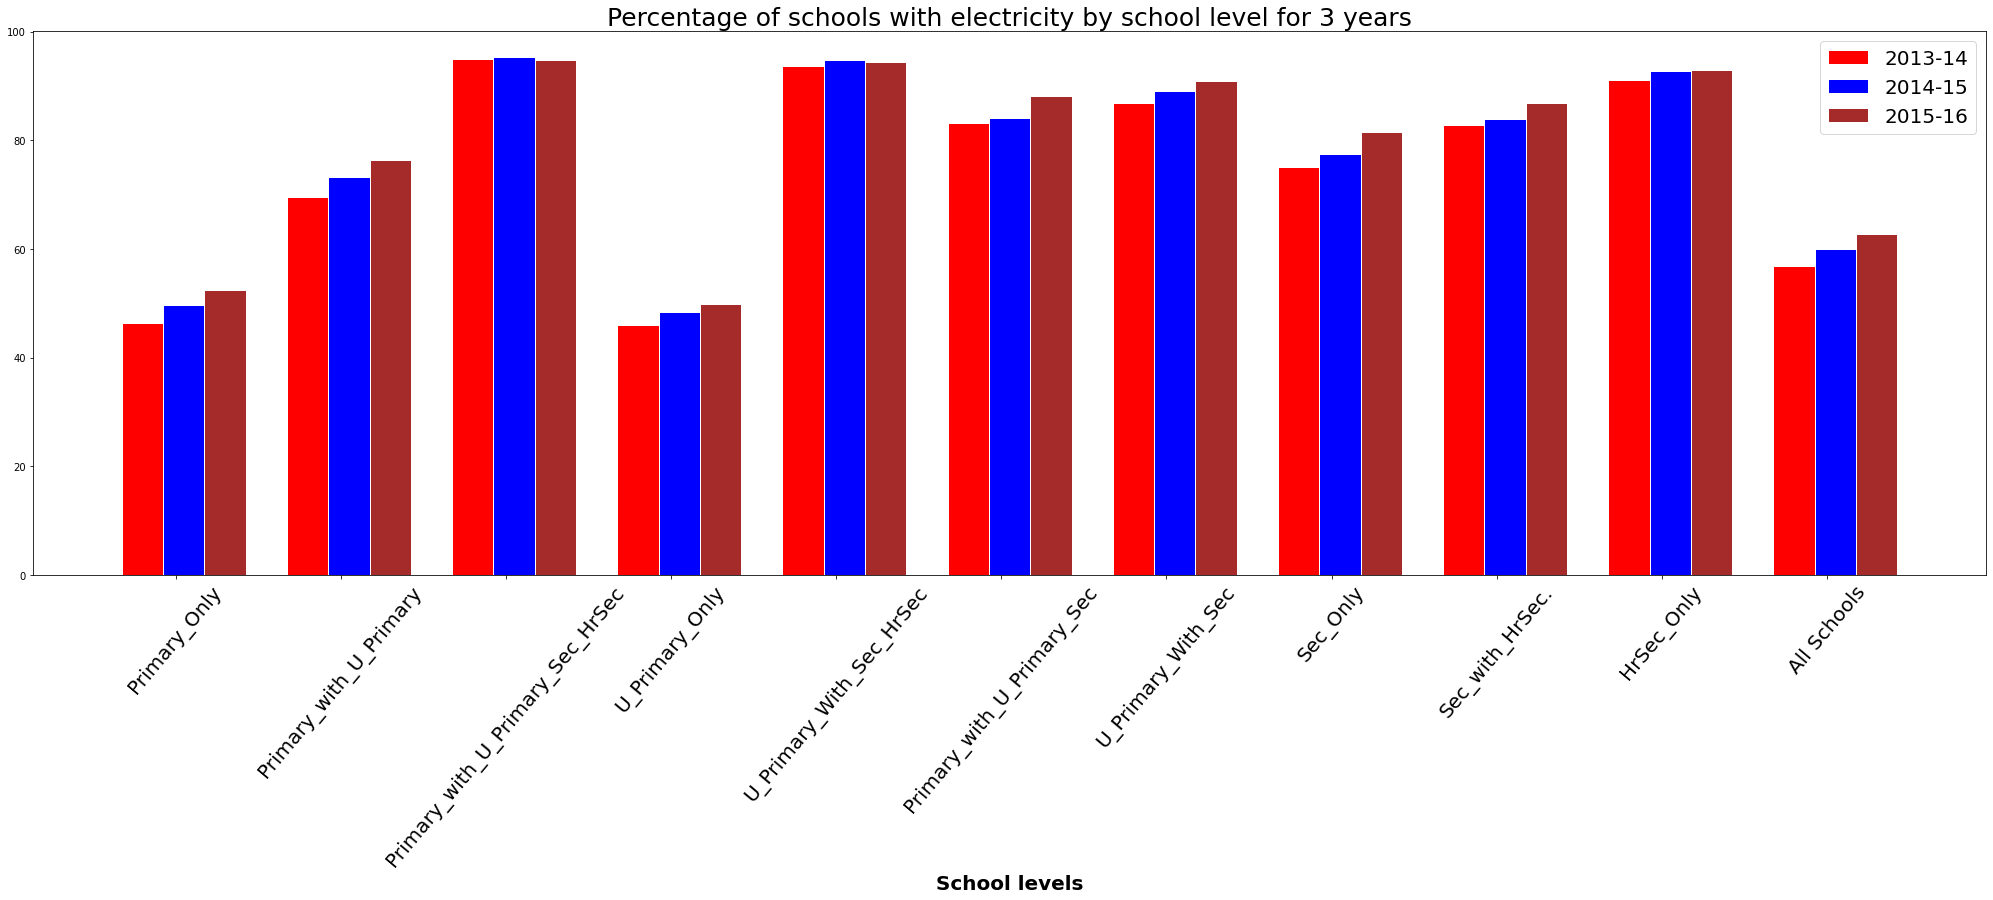

In [36]:
#Plotting percentage of schools with electricity by school level for 3 years 

all_df_levels=all_df.drop(["State_UT","year"], axis=1)

bars1 = all_df_levels.iloc[0]
bars2 = all_df_levels.iloc[1]
bars3 = all_df_levels.iloc[2]

barWidth = 0.25
barWidth1=0.3

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(35,10))
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='2013-14')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='2014-15')
plt.bar(r3, bars3, color='brown', width=barWidth, edgecolor='white', label='2015-16')

plt.xlabel('School levels', fontweight='bold',fontsize=20)
plt.xticks([r + 0.2 for r in range(len(bars1))], all_df_levels.columns, rotation=50,fontsize=20)
plt.legend(fontsize=20)
plt.title("Percentage of schools with electricity by school level for 3 years",fontsize=25)
plt.show()



From chart above it can be seen that there is a general increase in electricity facilities in the whole country over the years but the primary and Upper Primary seem to have a lower percentage than the other levels of school

In [47]:
Checking for electricity levels below 70%
#all_df.set_index("year",inplace=True)
def check_under_70(columns):
    li_names=[ ]
    for names in columns:
        
        if all(all_df[names]<70):
            li_names.append(names)
      
    return all_df[li_names]
    


check_under_70(all_df_levels.columns).drop("All Schools",axis=1)    
        

Primary_Only  U_Primary_Only
year                                 
2013-14         46.38           45.97
2014-15         49.63           48.33
2015-16         52.40           49.86

In [61]:
df_enrollment[["Primary_Total","Upper_Primary_Total","State_UT","Year"]][df_enrollment["State_UT"]=="All India"]

Primary_Total  Upper_Primary_Total   State_UT     year
35          101.36                89.33  All India  2013-14
72           99.21                92.81  All India  2015-16
109         100.08                91.24  All India  2014-15

As can be seen from the first table above both the Primary and upper primary have electricity levels below 70%, and when compared to the enrollment as seen in the second table there is no indication of reduced enrollment for those years

In [44]:
#Use Pandas profiling to perform EDA
pandas_profiling.ProfileReport(df_elec)

In [4]:
df_dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           110 non-null    int64  
 1   State_UT             110 non-null    object 
 2   year                 110 non-null    object 
 3   Primary_Boys         110 non-null    float64
 4   Primary_Girls        110 non-null    float64
 5   Primary_Total        110 non-null    float64
 6   Upper Primary_Boys   110 non-null    float64
 7   Upper Primary_Girls  110 non-null    float64
 8   Upper Primary_Total  110 non-null    float64
 9   Secondary _Boys      110 non-null    float64
 10  Secondary _Girls     110 non-null    float64
 11  Secondary _Total     110 non-null    float64
 12  HrSecondary_Boys     110 non-null    float64
 13  HrSecondary_Girls    110 non-null    float64
 14  HrSecondary_Total    110 non-null    float64
dtypes: float64(12), int64(1), object(2)
memo

In [5]:
df_dropout.drop("Unnamed: 0",axis=1,inplace=True)

In [48]:
len(df_dropout["State_UT"].unique())

37

In [49]:
df_dropout.dtypes

State_UT                object
year                    object
Primary_Boys           float64
Primary_Girls          float64
Primary_Total          float64
Upper Primary_Boys     float64
Upper Primary_Girls    float64
Upper Primary_Total    float64
Secondary _Boys        float64
Secondary _Girls       float64
Secondary _Total       float64
HrSecondary_Boys       float64
HrSecondary_Girls      float64
HrSecondary_Total      float64
dtype: object

In [50]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State_UT                          110 non-null    object 
 1   year                              110 non-null    object 
 2   Primary_Only                      110 non-null    float64
 3   Primary_with_U_Primary            110 non-null    float64
 4   Primary_with_U_Primary_Sec_HrSec  110 non-null    float64
 5   U_Primary_Only                    110 non-null    float64
 6   U_Primary_With_Sec_HrSec          110 non-null    float64
 7   Primary_with_U_Primary_Sec        110 non-null    float64
 8   U_Primary_With_Sec                110 non-null    float64
 9   Sec_Only                          110 non-null    float64
 10  Sec_with_HrSec.                   110 non-null    float64
 11  HrSec_Only                        110 non-null    float64
 12  All Scho

In [243]:
df_elec.rename(columns={"Sec_with_HrSec.":"Sec_with_HrSec"},inplace=True)

In [57]:
df_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              110 non-null    int64  
 1   State_UT                110 non-null    object 
 2   Year                    110 non-null    object 
 3   Primary_Boys            110 non-null    float64
 4   Primary_Girls           110 non-null    float64
 5   Primary_Total           110 non-null    float64
 6   Upper_Primary_Boys      110 non-null    float64
 7   Upper_Primary_Girls     110 non-null    float64
 8   Upper_Primary_Total     110 non-null    float64
 9   Secondary_Boys          110 non-null    float64
 10  Secondary_Girls         110 non-null    float64
 11  Secondary_Total         110 non-null    float64
 12  Higher_Secondary_Boys   110 non-null    float64
 13  Higher_Secondary_Girls  110 non-null    float64
 14  Higher_Secondary_Total  110 non-null    fl

In [58]:
df_enrollment.drop("Unnamed: 0",axis=1,inplace=True)

In [59]:
df_enrollment.rename(columns={"Year":"year"}, inplace=True)

<b>Merging and Comparing the datasets to find out if the electricy is a factor in  gross enrollment and dropout ratio</b>

In [51]:
#Function to compare State columns to ensure consistency across the three datasets during merging
def compare_columns(f_cols,s_cols,f_name,s_name):
    f_val = []
    s_val = []
    
    for vals in f_cols:
        f_val.append(vals)
    
    for valss in s_cols:
        s_val.append(valss)
        
        
    print("Values in {} only".format(f_name))
    for n in f_val:
        if (n not in s_val):
            print(n)
    print("------------------------------")
    
    print("Values in {} only".format(s_name))
    for k in s_val:
        if (k not in f_val):
            print(k)

In [52]:
compare_columns(df_elec["State_UT"],df_enrollment["State_UT"],"electricity","enrollment")

Values in electricity only
------------------------------
Values in enrollment only


In [53]:
compare_columns(df_elec["State_UT"],df_dropout["State_UT"],"electricity","dropout")

Values in electricity only
Andaman & Nicobar Islands
Andaman & Nicobar Islands
Andaman & Nicobar Islands
Jammu And Kashmir
Jammu And Kashmir
Jammu And Kashmir
------------------------------
Values in dropout only
A & N Islands
A & N Islands
A & N Islands
Jammu & Kashmir
Jammu & Kashmir
Jammu & Kashmir


In [55]:
df_dropout["State_UT"].replace({"A & N Islands":"Andaman & Nicobar Islands","Jammu & Kashmir":"Jammu And Kashmir"},inplace=True)

In [56]:
compare_columns(df_elec["State_UT"],df_dropout["State_UT"],"electricity","dropout")

Values in electricity only
------------------------------
Values in dropout only


In [63]:
#Adding a sufix to each dataframe to be able to differentate when merged
df_enrollment.columns=df_enrollment.columns.map(lambda x: x +"_enrol" if x !="State_UT" and x !="year" else x)
df_elec.columns = df_elec.columns.map(lambda x: x+"_elec" if x != "State_UT" and x!= "year" else x )
df_dropout.columns = df_dropout.columns.map(lambda x: x+"_drop" if x!= "State_UT" and x!="year" else x)

In [95]:
#Splitting into the individual years
df_elec_13=df_elec[df_elec["year"]=="2013-14"]
df_elec_14=df_elec[df_elec["year"]=="2014-15"]
df_elec_15=df_elec[df_elec["year"]=="2015-16"]

df_enrollment_13=df_enrollment[df_enrollment["year"]=="2013-14"]
df_enrollment_14=df_enrollment[df_enrollment["year"]=="2014-15"]
df_enrollment_15=df_enrollment[df_enrollment["year"]=="2015-16"]

#Dropout starts from 2012-13 and doesn't have 2015-16
df_dropout_13=df_dropout[df_dropout["year"]=="2013-14"]
df_dropout_14=df_dropout[df_dropout["year"]=="2014-15"]


In [65]:
#Function to sort the percentage of schools with electricity for each state by levelto find the highest and lowest   
def get_top_bottom(columns,df,enrol_title,drop_title,nos=5):
    lowest={}
    highest={} 
    for names in columns:
        sorted_df =df.sort_values(by=names)
       # print("------------------------------------")
        #print("Top five states with lowest electricity for {}".format(names))
        df_names =sorted_df.head(nos)[["State_UT",names,enrol_title,drop_title]]
        lowest[names]=df_names
       # print("Top five states with highest electricity for {}".format(names))
        df_names =sorted_df.tail(nos)[["State_UT",names,enrol_title,drop_title]]
        highest[names]=df_names
       
    return lowest,highest
        
        

In [66]:
#Similar function to the one above but no Dropout comparison because there is no 2015-16 for dropout  
def get_top_bottom_nodrop(columns,df,enrol_title,nos=5):
    lowest={}
    highest={} 
    for names in columns:
        sorted_df =df.sort_values(by=names)
       # print("------------------------------------")
        #print("Top five states with lowest electricity for {}".format(names))
        df_names =sorted_df.head(nos)[["State_UT",names,enrol_title]]
        lowest[names]=df_names
       # print("Top five states with highest electricity for {}".format(names))
        df_names =sorted_df.tail(nos)[["State_UT",names,enrol_title]]
        highest[names]=df_names
       
    return lowest,highest
        
        

In [68]:
df_elec_13.shape

(36, 13)

In [69]:
df_elec_14.shape

(37, 13)

In [71]:
df_elec_15.shape

(37, 13)

In [97]:
compare_columns(df_elec_15["State_UT"],df_elec_13["State_UT"],"'15","'13")

Values in '15 only
Telangana
------------------------------
Values in '13 only


In [105]:
compare_columns(df_enrollment_15["State_UT"],df_enrollment_13["State_UT"],"'15","'13")

Values in '15 only
Telangana
Uttarakhand
------------------------------
Values in '13 only


In [93]:
compare_columns(df_dropout_14["State_UT"],df_dropout_13["State_UT"],"'15","'13")

Values in '15 only
------------------------------
Values in '13 only


After checking the shape of the individual year dfs it was noticed that there was a disparity in the number of observations and when the two columns were compared using the function above it was found that Telangana was not included in the 2013-14 data of enrollment and  and the state Uttarakhand was entered wrongly as Uttar Pradesh creating a duplicate in the enrollment years of 2013-14 and 2014-15 but this was corrected as shown below 

In [128]:
df_enrollment_13["State_UT"].duplicated().sum()

1

In [130]:
df_enrollment_13["State_UT"].where(~df_enrollment_13["State_UT"].duplicated(),"Uttarakhand", inplace=True)

C:\Users\agbaj\anaconda3\lib\site-packages\pandas\core\generic.py:9005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


In [131]:
df_enrollment_14["State_UT"].where(~df_enrollment_14["State_UT"].duplicated(),"Uttarakhand", inplace=True)

In [132]:
df_enrollment_13["State_UT"].duplicated().sum()

0

In [133]:
df_enrollment_14["State_UT"].duplicated().sum()

0

In [135]:
#Merging of the datasets
ee_df_13 = pd.merge(df_elec_13,df_enrollment_13,on="State_UT")
ee_df_14 = pd.merge(df_elec_14,df_enrollment_14,on="State_UT")
#Total dataset containg the three datasets except for 2015-16 dropout
t_df_15 = pd.merge(df_elec_15,df_enrollment_15,on="State_UT")
t_df_13 = pd.merge(ee_df_13,df_dropout_13,on="State_UT")
t_df_14 = pd.merge(ee_df_14,df_dropout_14,on="State_UT")

In [136]:
t_df_15.head()

State_UT   year_x  Primary_Only_elec  \
0  Andaman & Nicobar Islands  2015-16              82.11   
1             Andhra Pradesh  2015-16              91.65   
2          Arunachal Pradesh  2015-16              22.64   
3                      Assam  2015-16              12.76   
4                      Bihar  2015-16              22.28   

   Primary_with_U_Primary_elec  Primary_with_U_Primary_Sec_HrSec_elec  \
0                        97.62                                 100.00   
1                        95.62                                 100.00   
2                        53.87                                  95.52   
3                        58.50                                  92.34   
4                        53.42                                  62.69   

   U_Primary_Only_elec  U_Primary_With_Sec_HrSec_elec  \
0                 0.00                         100.00   
1               100.00                          90.23   
2                84.00                          94.34   
3                34.77                          93.60   
4                47.60                          84.78   

   Primary_with_U_Primary_Sec_elec  U_Primary_With_Sec_elec  Sec_Only_elec  \
0                           100.00                     0.00           0.00   
1                            97.09                    97.58          91.30   
2                            82.59                    87.18           0.00   
3                            79.84                    83.41          64.22   
4                            56.86                    41.46          41.06   

   ...  Primary_Total_enrol  Upper_Primary_Boys_enrol  \
0  ...                88.93                     86.35   
1  ...                84.48                     81.12   
2  ...               126.76                    127.14   
3  ...               106.11                     87.65   
4  ...               107.67                     98.21   

   Upper_Primary_Girls_enrol Upper_Primary_Total_enrol  Secondary_Boys_enrol  \
0                      81.97                     84.14                 89.07   
1                      81.56                     81.33                 74.63   
2                     133.20                    130.13                 91.66   
3                      98.75                     93.05                 72.48   
4                     119.39                    107.89                 72.42   

   Secondary_Girls_enrol  Secondary_Total_enrol  Higher_Secondary_Boys_enrol  \
0                  84.28                  86.69                        72.92   
1                  76.48                  75.51                        58.28   
2                  87.58                  89.63                        62.02   
3                  83.04                  77.59                        38.22   
4                  85.43                  78.37                        34.76   

   Higher_Secondary_Girls_enrol  Higher_Secondary_Total_enrol  
0                         76.40                         74.62  
1                         62.27                         60.16  
2                         61.60                         61.81  
3                         39.47                         38.81  
4                         36.66                         35.62  

[5 rows x 26 columns]

<b><i>States with lowest electricity in Primary schools compared with their enrollment and dropout</i></b>

<b>Primary</b>

In [140]:
t_lowest_13,t_highest_13=get_top_bottom(t_df_13.drop(["State_UT"],axis=1).columns,t_df_13,"Primary_Total_enrol","Primary_Total_drop")
t_lowest_14,t_highest_14=get_top_bottom(t_df_14.drop(["State_UT"],axis=1).columns,t_df_14,"Primary_Total_enrol","Primary_Total_drop")
t_lowest_15,t_highest_15=get_top_bottom_nodrop(t_df_15.drop(["State_UT"],axis=1).columns,t_df_15,"Primary_Total_enrol")

Primary_Only_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

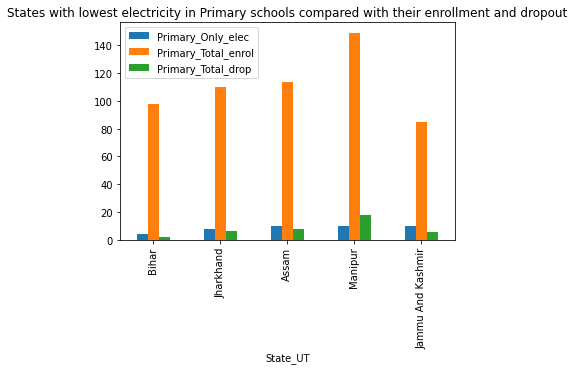

In [143]:
t_lowest_13["Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")


<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

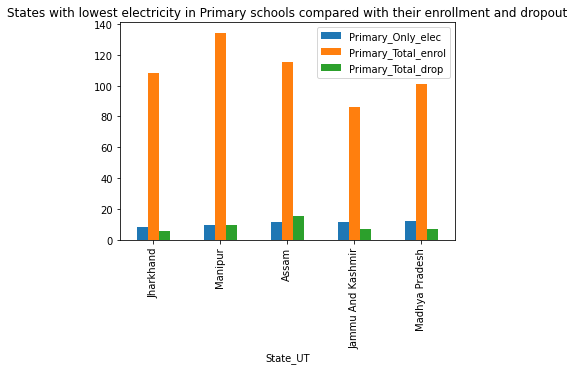

In [144]:
t_lowest_14["Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

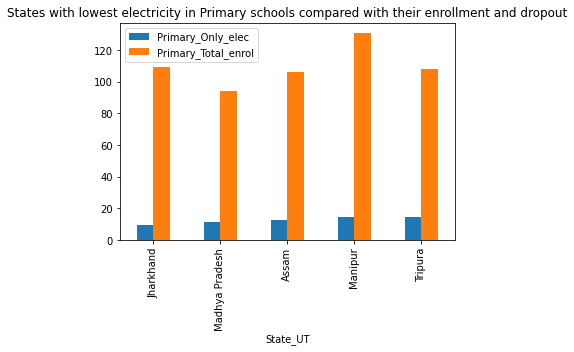

In [145]:
t_lowest_15["Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

Primary_with_U_Primary_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

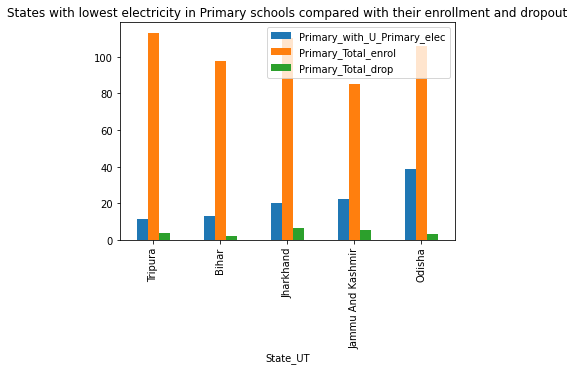

In [146]:

t_lowest_13["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

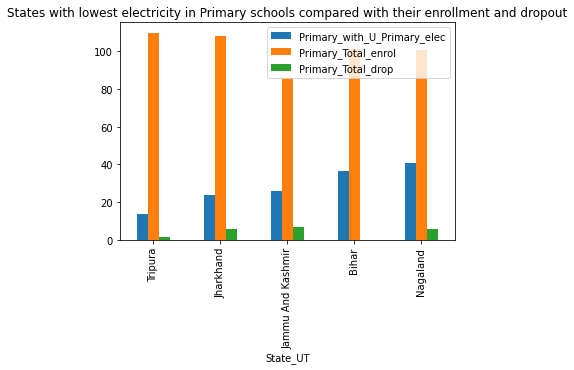

In [147]:
t_lowest_14["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

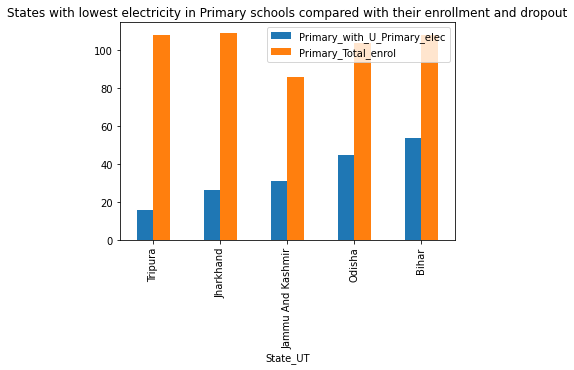

In [148]:
t_lowest_15["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

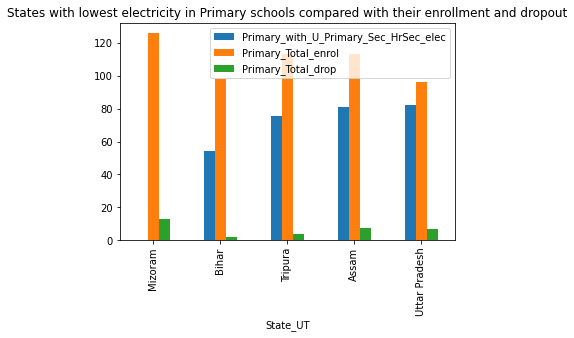

In [149]:
t_lowest_13["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

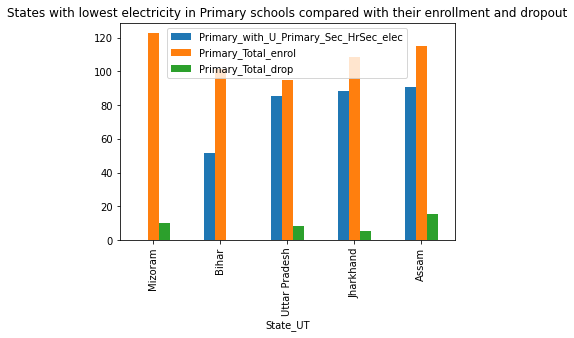

In [150]:
t_lowest_14["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

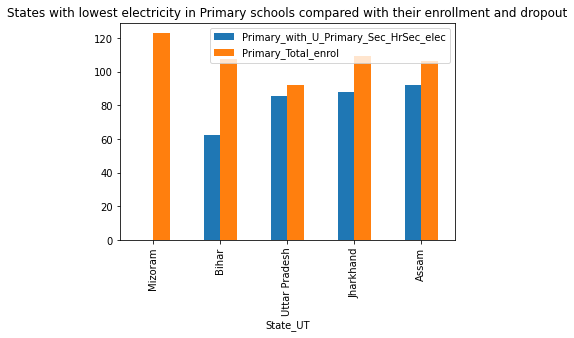

In [151]:
t_lowest_15["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

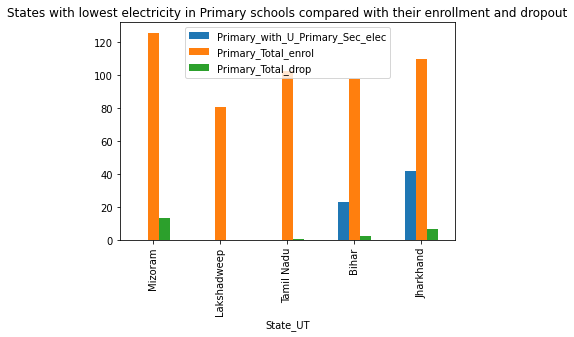

In [152]:
t_lowest_13["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

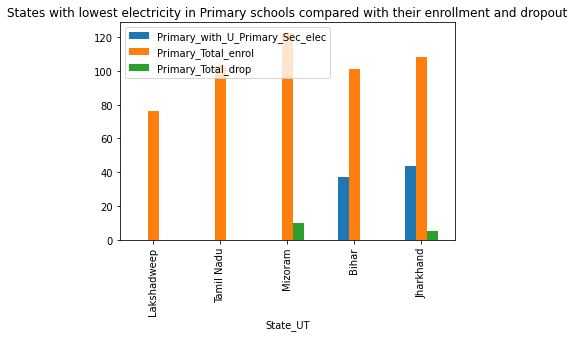

In [153]:
t_lowest_14["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

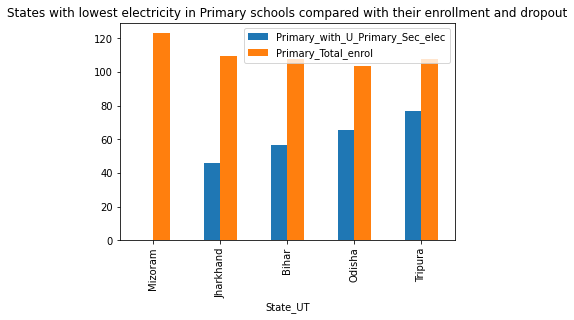

In [154]:
t_lowest_15["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<b>Upper primary</b>

In [155]:
Up_t_lowest_13,Up_t_highest_13=get_top_bottom(t_df_13.drop(["State_UT"],axis=1).columns,t_df_13,"Upper_Primary_Total_enrol","Upper Primary_Total_drop")
Up_t_lowest_14,Up_t_highest_14=get_top_bottom(t_df_14.drop(["State_UT"],axis=1).columns,t_df_14,"Upper_Primary_Total_enrol","Upper Primary_Total_drop")
Up_t_lowest_15,Up_t_highest_15=get_top_bottom_nodrop(t_df_15.drop(["State_UT"],axis=1).columns,t_df_15,"Upper_Primary_Total_enrol")

Primary_with_U_Primary_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

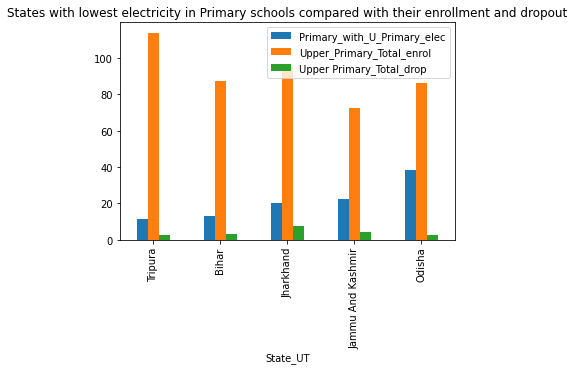

In [156]:

Up_t_lowest_13["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

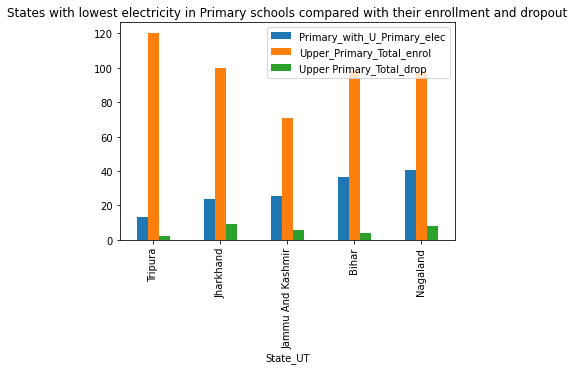

In [157]:
Up_t_lowest_14["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

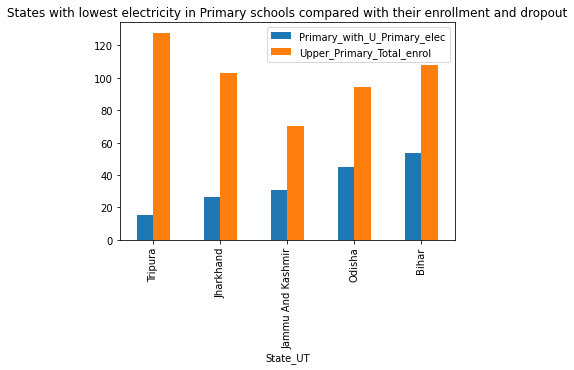

In [158]:
Up_t_lowest_15["Primary_with_U_Primary_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

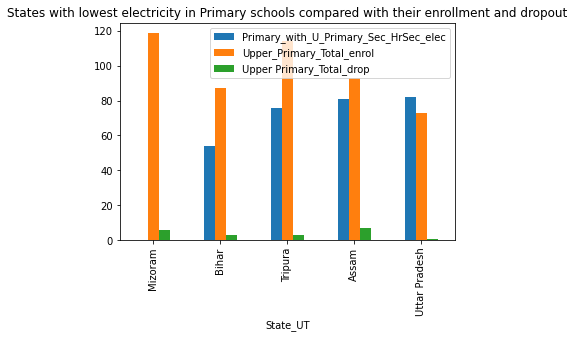

In [159]:
Up_t_lowest_13["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

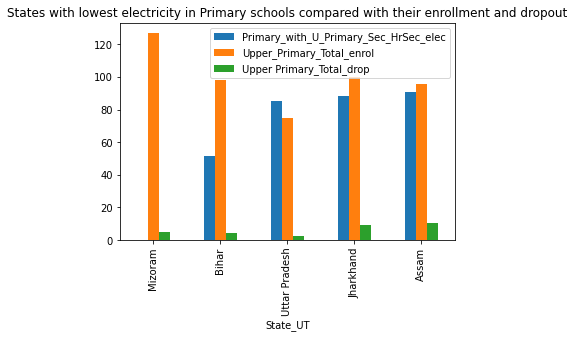

In [160]:
Up_t_lowest_14["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

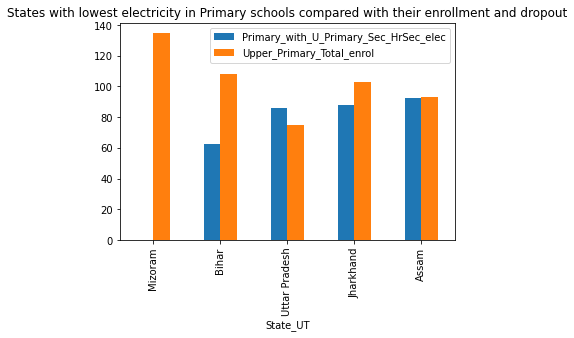

In [161]:
Up_t_lowest_15["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

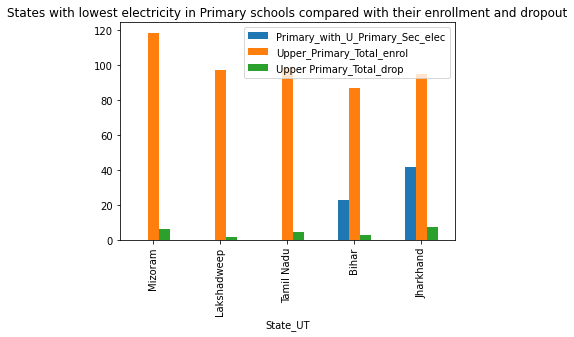

In [162]:
Up_t_lowest_13["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

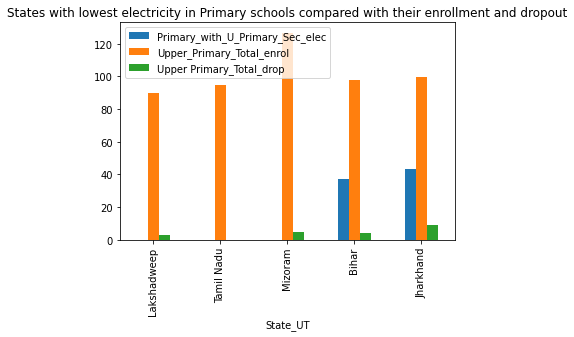

In [163]:
Up_t_lowest_14["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

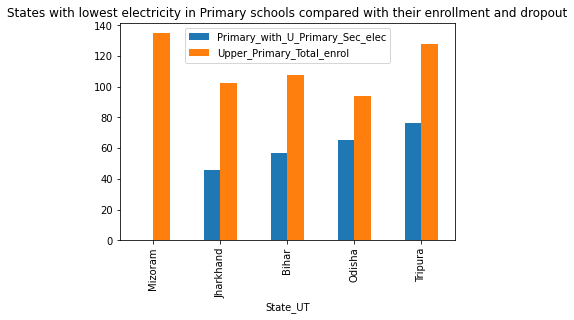

In [164]:
Up_t_lowest_15["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

U_Primary_Only_elec  

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

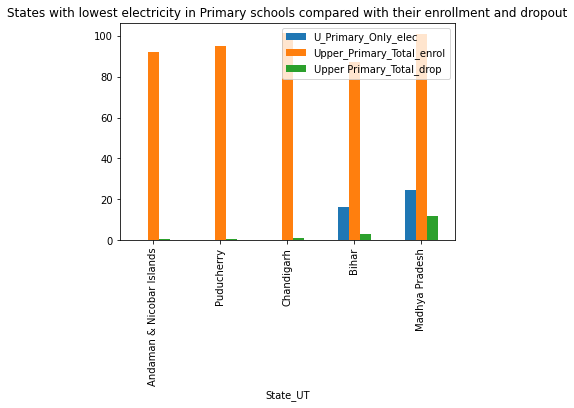

In [165]:
Up_t_lowest_13["U_Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

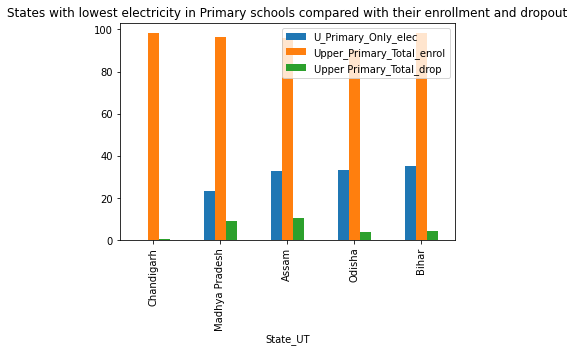

In [166]:
Up_t_lowest_14["U_Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

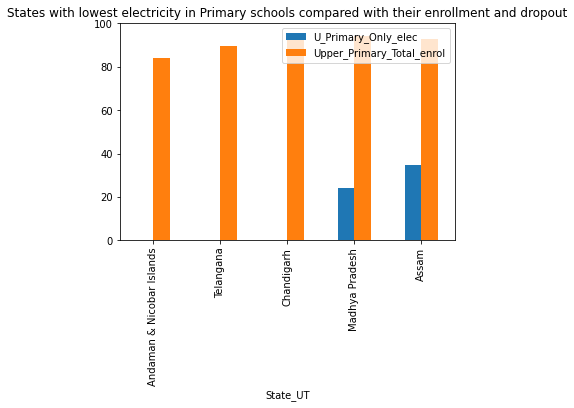

In [167]:
Up_t_lowest_15["U_Primary_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

U_Primary_With_Sec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

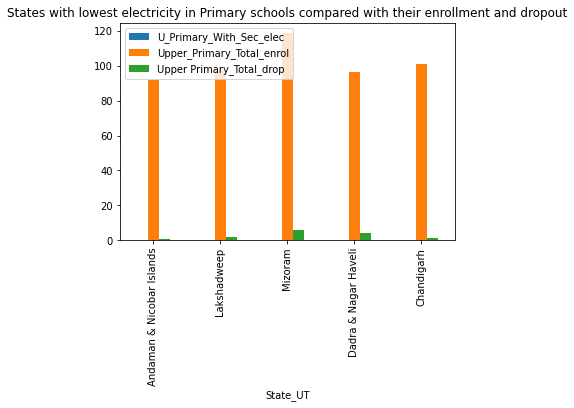

In [168]:
Up_t_lowest_13["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

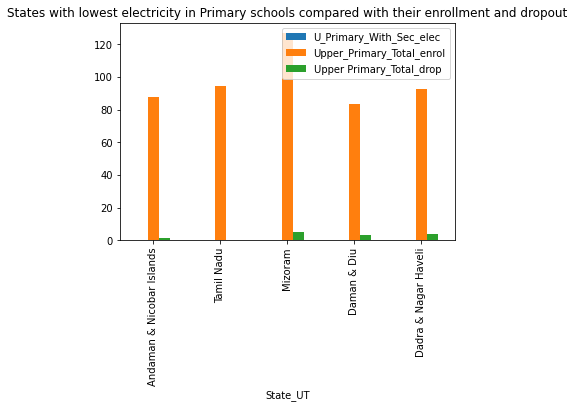

In [169]:
Up_t_lowest_14["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

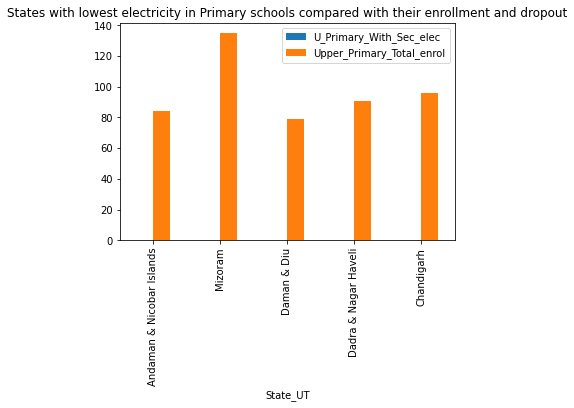

In [170]:
Up_t_lowest_15["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

U_Primary_With_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

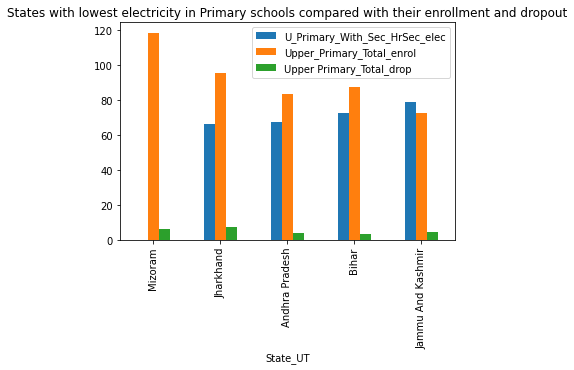

In [171]:
Up_t_lowest_13["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

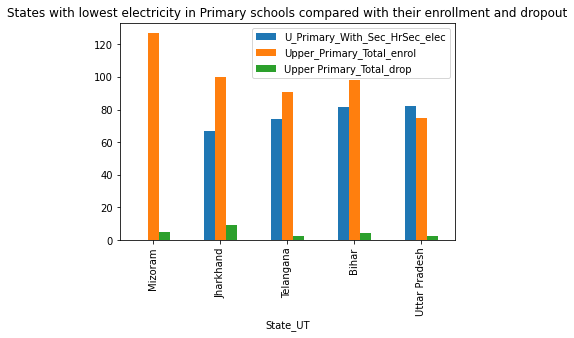

In [172]:
Up_t_lowest_14["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Primary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

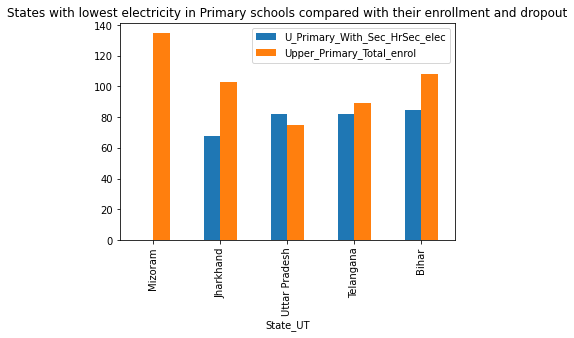

In [173]:
Up_t_lowest_15["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Primary schools compared with their enrollment and dropout")

<b><i>States with lowest electricity in Secondary schools compared with their enrollment and dropout</i></b>

<b>Secondary</b>

In [175]:
S_t_lowest_13,Up_t_highest_13=get_top_bottom(t_df_13.drop(["State_UT"],axis=1).columns,t_df_13,"Secondary_Total_enrol","Secondary _Total_drop")
S_t_lowest_14,Up_t_highest_14=get_top_bottom(t_df_14.drop(["State_UT"],axis=1).columns,t_df_14,"Secondary_Total_enrol","Secondary _Total_drop")
S_t_lowest_15,Up_t_highest_15=get_top_bottom_nodrop(t_df_15.drop(["State_UT"],axis=1).columns,t_df_15,"Secondary_Total_enrol")

Primary_with_U_Primary_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

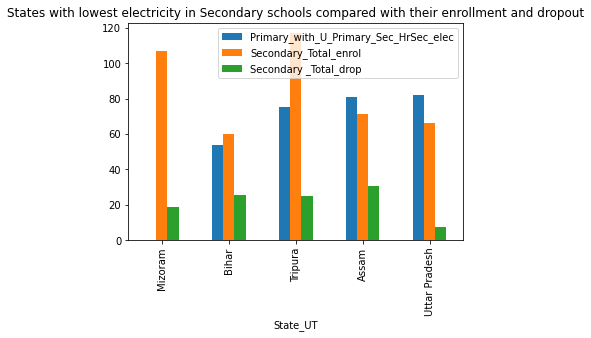

In [176]:
S_t_lowest_13["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

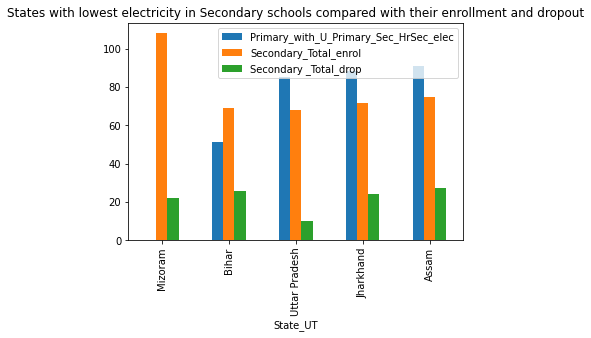

In [177]:
S_t_lowest_14["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

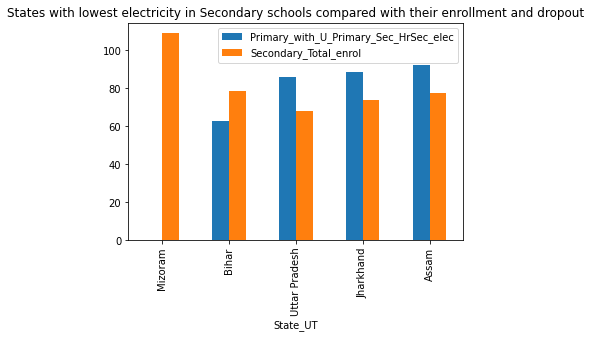

In [178]:
S_t_lowest_15["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

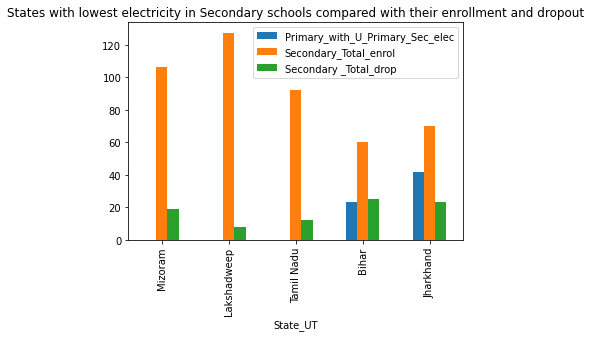

In [179]:
S_t_lowest_13["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

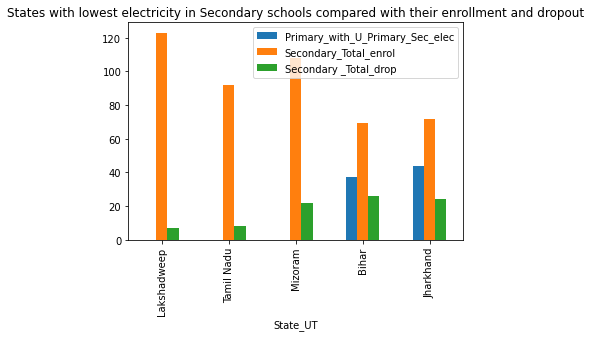

In [180]:
S_t_lowest_14["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

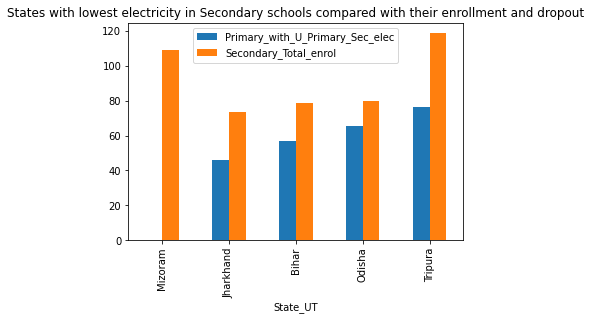

In [181]:
S_t_lowest_15["Primary_with_U_Primary_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

U_Primary_With_Sec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

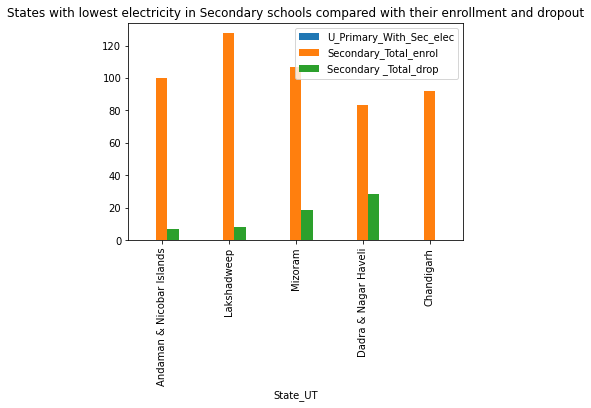

In [182]:
S_t_lowest_13["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

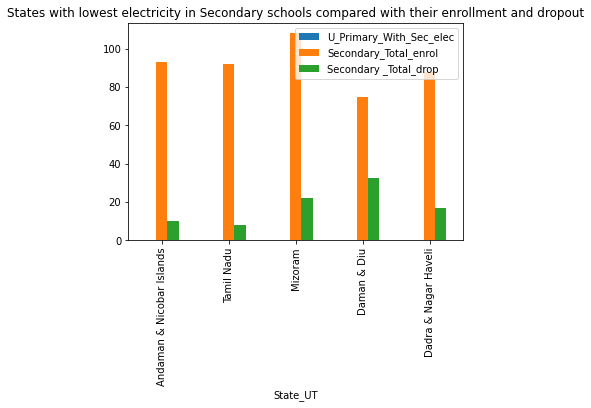

In [183]:
S_t_lowest_14["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

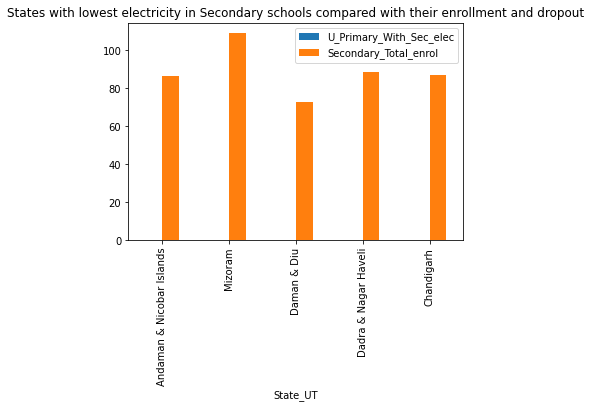

In [184]:
S_t_lowest_15["U_Primary_With_Sec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

U_Primary_With_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

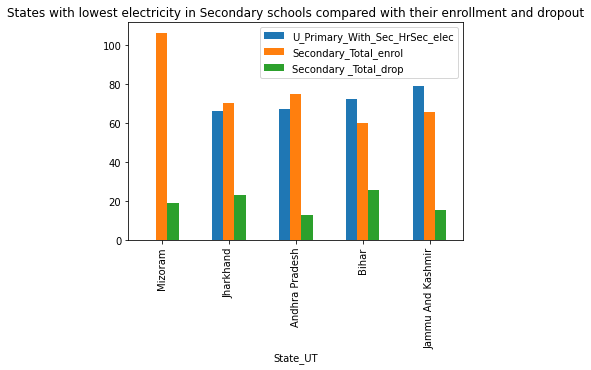

In [185]:
S_t_lowest_13["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

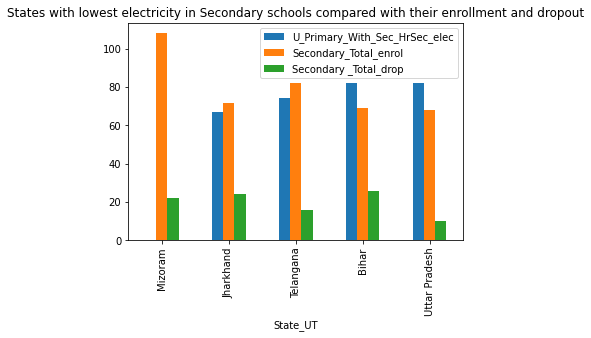

In [186]:
S_t_lowest_14["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

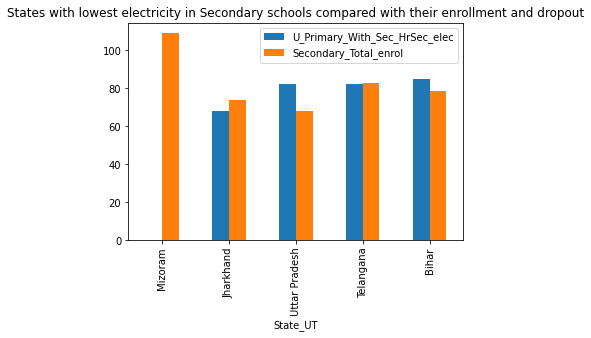

In [187]:
S_t_lowest_15["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

Sec_Only_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

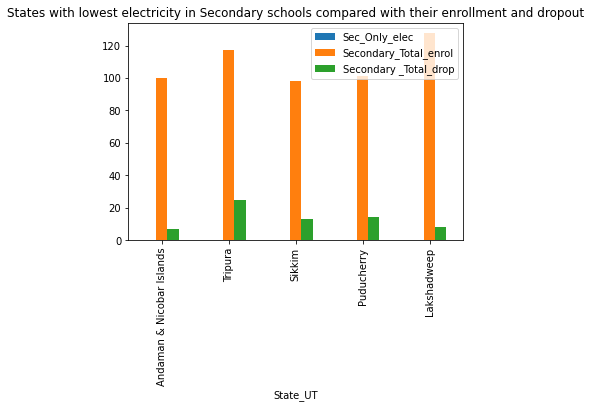

In [188]:
S_t_lowest_13["Sec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

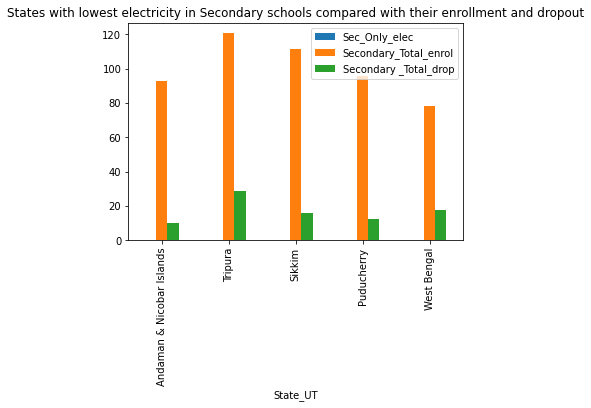

In [189]:
S_t_lowest_14["Sec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

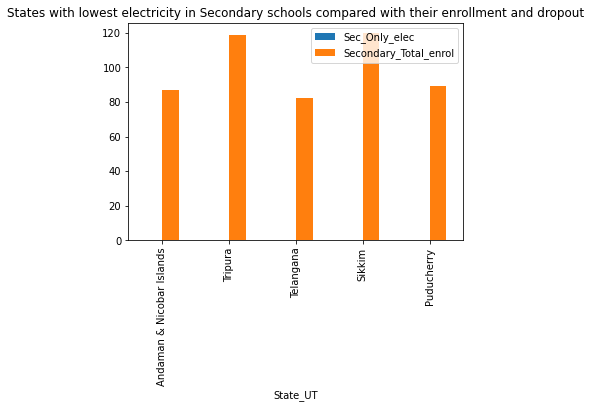

In [190]:
S_t_lowest_15["Sec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

Sec_with_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

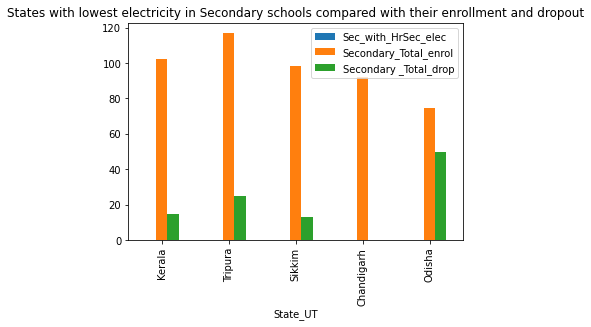

In [191]:
S_t_lowest_13["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

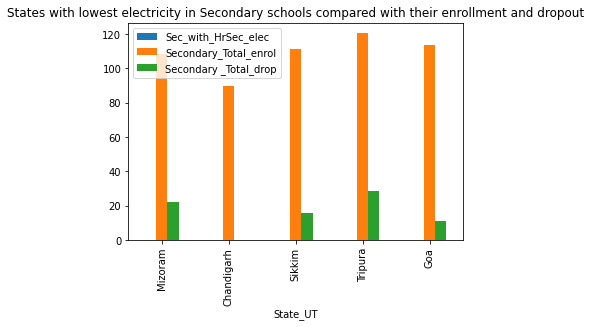

In [192]:
S_t_lowest_14["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

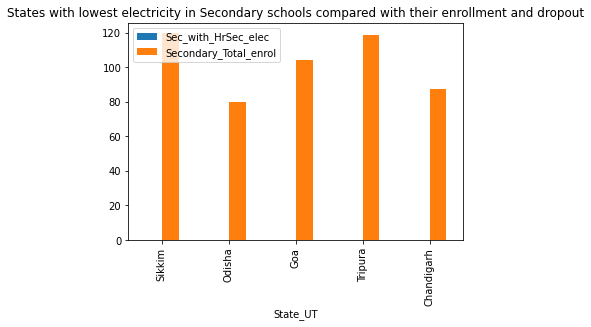

In [193]:
S_t_lowest_15["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<b>Higher Secondary</b>

In [195]:
HS_t_lowest_13,Up_t_highest_13=get_top_bottom(t_df_13.drop(["State_UT"],axis=1).columns,t_df_13,"Higher_Secondary_Total_enrol","HrSecondary_Total_drop")
HS_t_lowest_14,Up_t_highest_14=get_top_bottom(t_df_14.drop(["State_UT"],axis=1).columns,t_df_14,"Higher_Secondary_Total_enrol","HrSecondary_Total_drop")
HS_t_lowest_15,Up_t_highest_15=get_top_bottom_nodrop(t_df_15.drop(["State_UT"],axis=1).columns,t_df_15,"Higher_Secondary_Total_enrol")

U_Primary_With_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

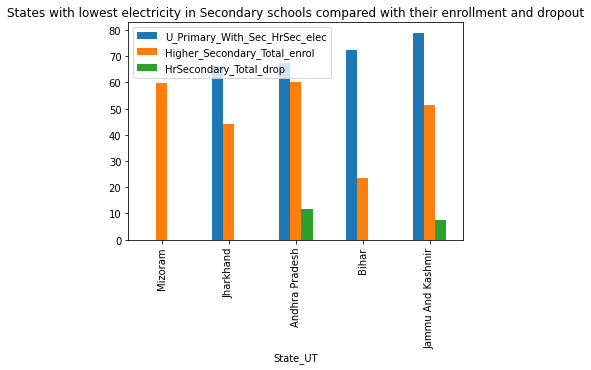

In [196]:
HS_t_lowest_13["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

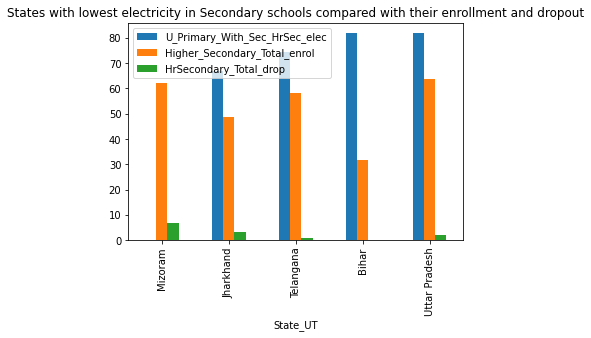

In [197]:
HS_t_lowest_14["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

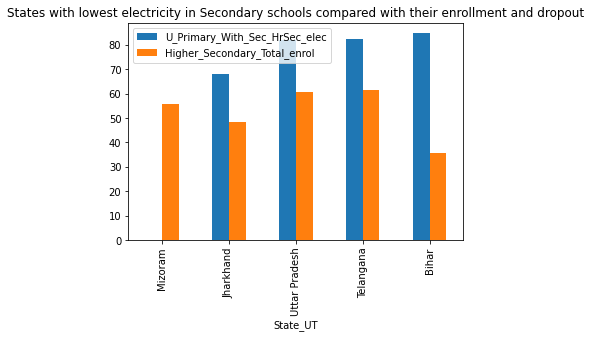

In [198]:
HS_t_lowest_15["U_Primary_With_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

Primary_with_U_Primary_Sec_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

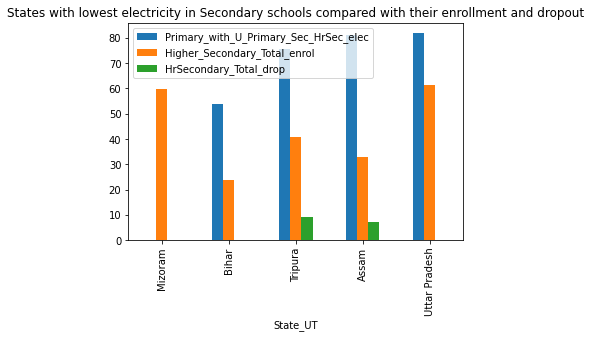

In [199]:
HS_t_lowest_13["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

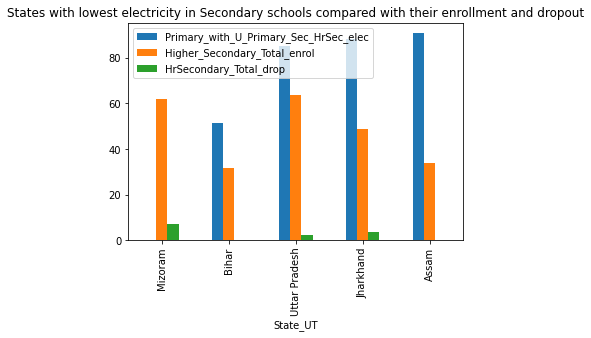

In [200]:
HS_t_lowest_14["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

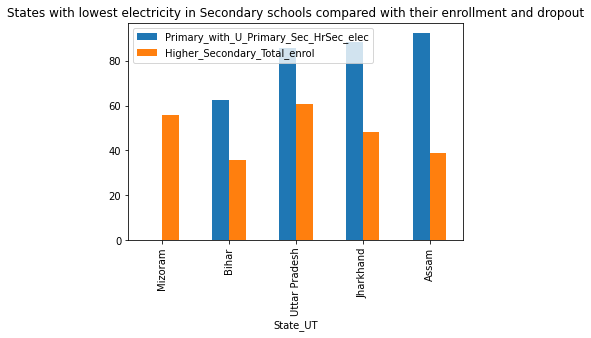

In [201]:
HS_t_lowest_15["Primary_with_U_Primary_Sec_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

Sec_with_HrSec_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

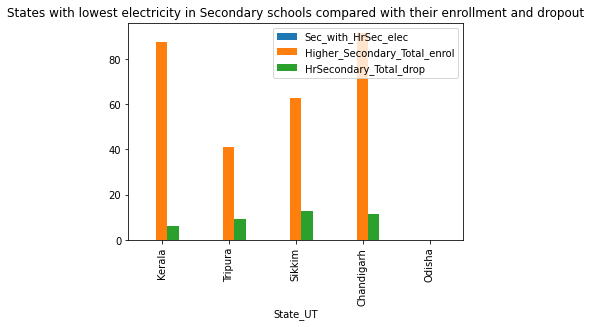

In [202]:
HS_t_lowest_13["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

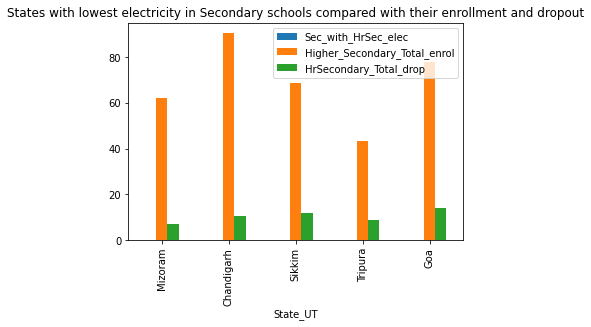

In [203]:
HS_t_lowest_14["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

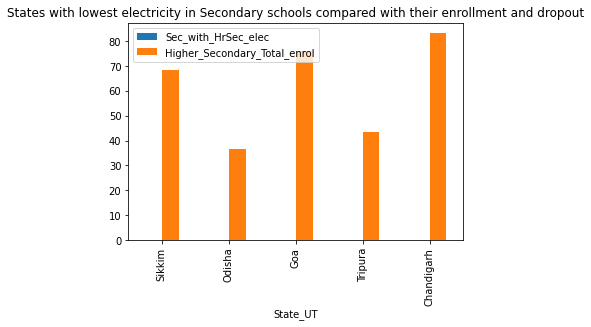

In [204]:
HS_t_lowest_15["Sec_with_HrSec_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

HrSec_Only_elec

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

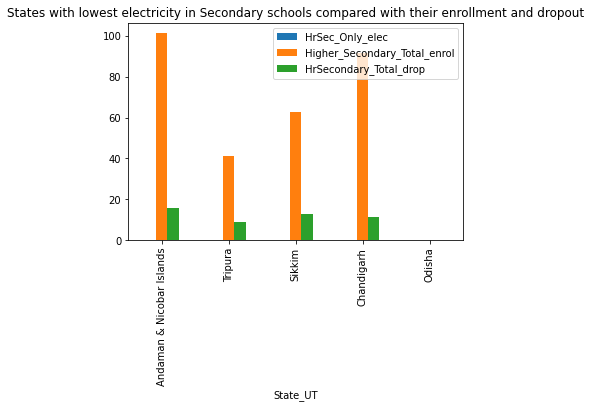

In [205]:
HS_t_lowest_13["HrSec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

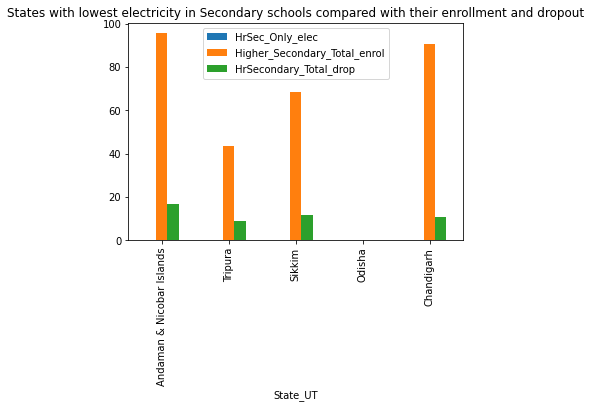

In [206]:
HS_t_lowest_14["HrSec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

<AxesSubplot:title={'center':'States with lowest electricity in Secondary schools compared with their enrollment and dropout'}, xlabel='State_UT'>

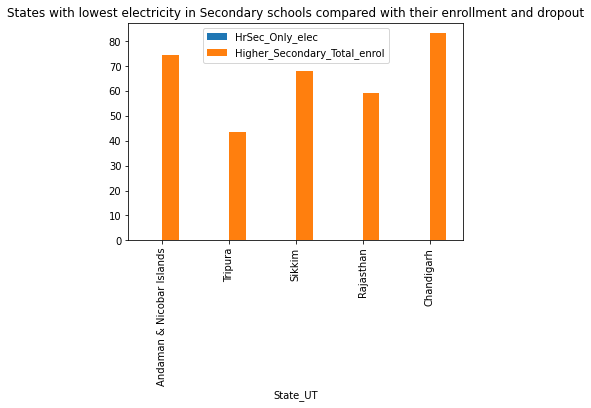

In [207]:
HS_t_lowest_15["HrSec_Only_elec"].set_index("State_UT").plot(kind="bar",title="States with lowest electricity in Secondary schools compared with their enrollment and dropout")

From The individual charts it can be seen that there is no real relationship between the availability of electricity in schools and the dropout rate or gross enrollment but to be completely sure pearson's correlation was done on the entire dataset and here is the result below 

<b>Correlation</b>

<AxesSubplot:>

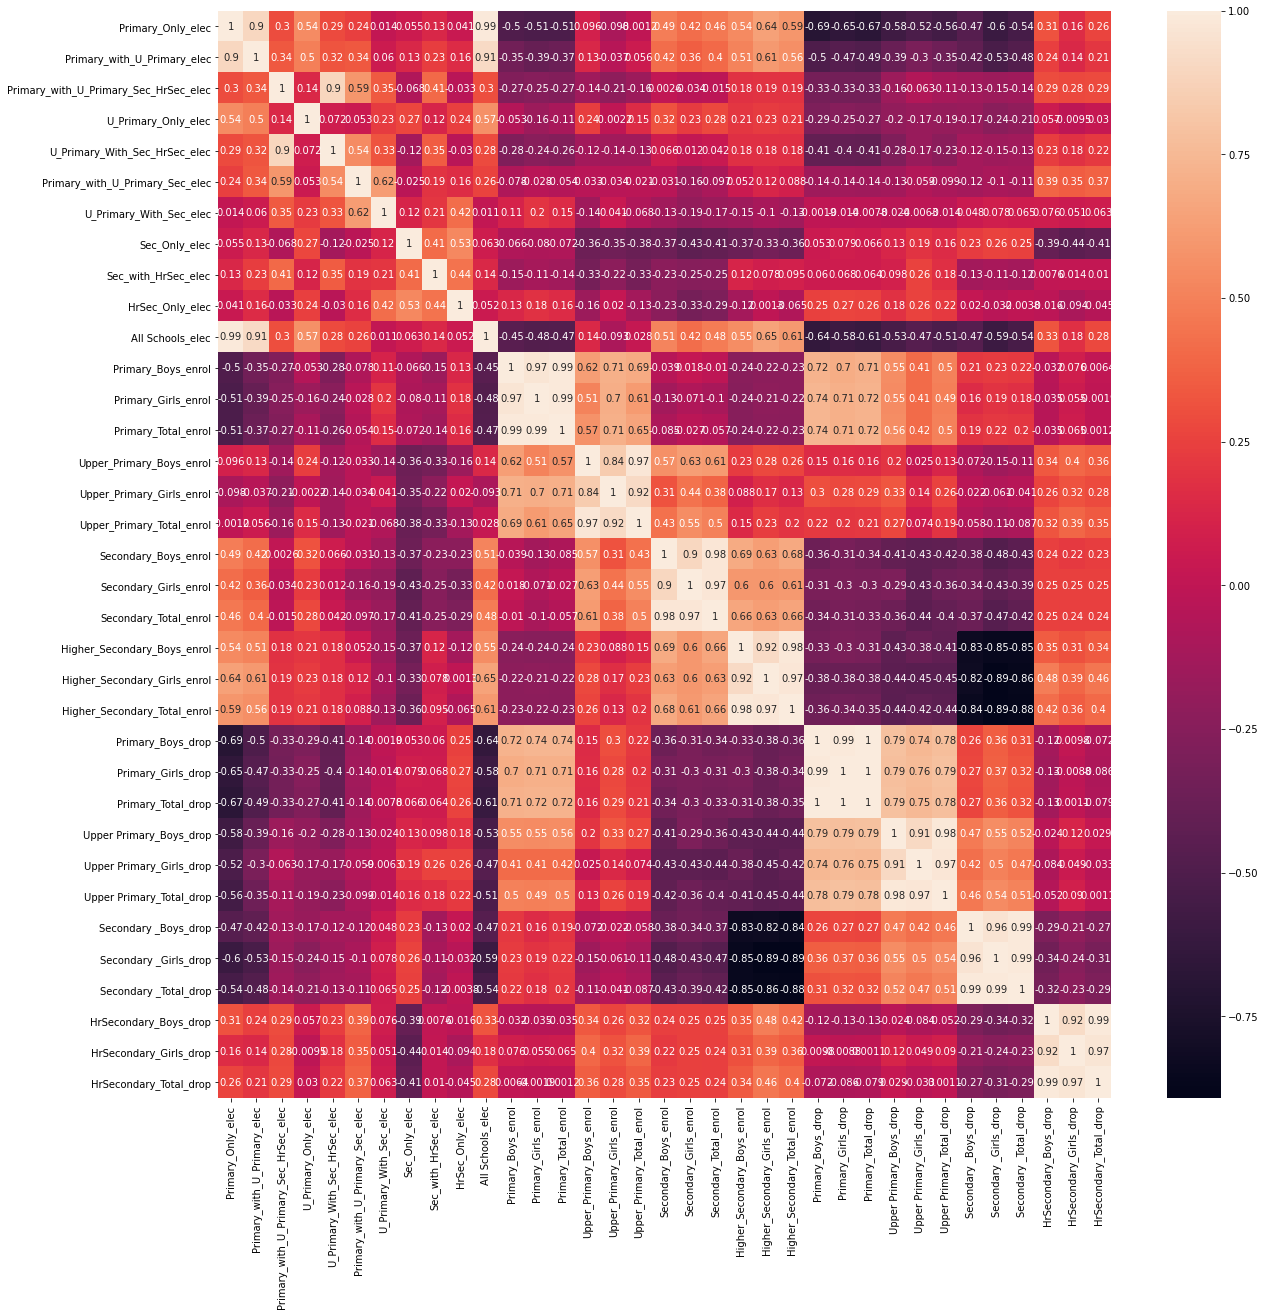

In [224]:
cor=t_df_13.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)


Values with correlation coefficient greater than 0.5 against Enrollment

In [210]:
cor[cor>0.5]["Primary_Total_enrol"].dropna().sort_values()

Upper Primary_Total_drop     0.502139
Upper Primary_Boys_drop      0.556191
Upper_Primary_Boys_enrol     0.572206
Upper_Primary_Total_enrol    0.653573
Primary_Girls_drop           0.707301
Upper_Primary_Girls_enrol    0.708783
Primary_Total_drop           0.724760
Primary_Boys_drop            0.736454
Primary_Girls_enrol          0.991170
Primary_Boys_enrol           0.991951
Primary_Total_enrol          1.000000
Name: Primary_Total_enrol, dtype: float64

In [211]:
cor[cor>0.5]["Upper_Primary_Total_enrol"].dropna().sort_values()

Secondary_Total_enrol        0.504284
Secondary_Girls_enrol        0.550489
Primary_Girls_enrol          0.608592
Primary_Total_enrol          0.653573
Primary_Boys_enrol           0.688639
Upper_Primary_Girls_enrol    0.915217
Upper_Primary_Boys_enrol     0.973836
Upper_Primary_Total_enrol    1.000000
Name: Upper_Primary_Total_enrol, dtype: float64

In [212]:
cor[cor>0.5]["Secondary_Total_enrol"].dropna().sort_values()

Upper_Primary_Total_enrol       0.504284
Upper_Primary_Boys_enrol        0.613085
Higher_Secondary_Girls_enrol    0.627046
Higher_Secondary_Total_enrol    0.658937
Higher_Secondary_Boys_enrol     0.661144
Secondary_Girls_enrol           0.971148
Secondary_Boys_enrol            0.976194
Secondary_Total_enrol           1.000000
Name: Secondary_Total_enrol, dtype: float64

In [213]:
cor[cor>0.5]["Higher_Secondary_Total_enrol"].dropna().sort_values()

Primary_with_U_Primary_elec     0.561863
Primary_Only_elec               0.591718
All Schools_elec                0.605858
Secondary_Girls_enrol           0.606253
Secondary_Total_enrol           0.658937
Secondary_Boys_enrol            0.675058
Higher_Secondary_Girls_enrol    0.973168
Higher_Secondary_Boys_enrol     0.983334
Higher_Secondary_Total_enrol    1.000000
Name: Higher_Secondary_Total_enrol, dtype: float64

Values with correlation coefficient greater than 0.5 against dropout

In [215]:
cor[cor>0.5]["Primary_Total_drop"].dropna().sort_values()

Primary_Boys_enrol          0.712514
Primary_Girls_enrol         0.723768
Primary_Total_enrol         0.724760
Upper Primary_Girls_drop    0.752050
Upper Primary_Total_drop    0.783966
Upper Primary_Boys_drop     0.788187
Primary_Girls_drop          0.996482
Primary_Boys_drop           0.996764
Primary_Total_drop          1.000000
Name: Primary_Total_drop, dtype: float64

In [216]:
cor[cor>0.5]["Upper Primary_Total_drop"].dropna().sort_values()

Primary_Boys_enrol          0.501032
Primary_Total_enrol         0.502139
Secondary _Total_drop       0.508675
Secondary _Girls_drop       0.542710
Primary_Boys_drop           0.777080
Primary_Total_drop          0.783966
Primary_Girls_drop          0.786091
Upper Primary_Girls_drop    0.972555
Upper Primary_Boys_drop     0.979252
Upper Primary_Total_drop    1.000000
Name: Upper Primary_Total_drop, dtype: float64

In [217]:
cor[cor>0.5]["Secondary _Total_drop"].dropna().sort_values()

Upper Primary_Total_drop    0.508675
Upper Primary_Boys_drop     0.516768
Secondary _Boys_drop        0.989434
Secondary _Girls_drop       0.989542
Secondary _Total_drop       1.000000
Name: Secondary _Total_drop, dtype: float64

In [218]:
cor[cor>0.5]["HrSecondary_Total_drop"].dropna().sort_values()

HrSecondary_Girls_drop    0.966909
HrSecondary_Boys_drop     0.989213
HrSecondary_Total_drop    1.000000
Name: HrSecondary_Total_drop, dtype: float64

As can be seen from the above outputs electricity has little to no correlation to the Gross Enrollment and Dropout ratio for all the levels of schools in india

In [228]:
#import randomforrest to check for feature importance
from sklearn.ensemble import RandomForestRegressor

#Split the dataset into predictors(features) and predicted(target)
df_x = t_df_13.drop(["Higher_Secondary_Total_enrol","State_UT","year_x","year","year_y"], axis=1)
df_y = t_df_13["Higher_Secondary_Total_enrol"]

names = df_x.columns

# Build the model
rfr = RandomForestRegressor()

# Fit the model
rfr.fit(df_x, df_y)

# Print the results
print("Features sorted by their score:")
print(sorted(zip(names,map(lambda x: round(x, 4), rfr.feature_importances_)), reverse=True))


Features sorted by their score:
[('Upper_Primary_Total_enrol', 0.0022), ('Upper_Primary_Girls_enrol', 0.0029), ('Upper_Primary_Boys_enrol', 0.0019), ('Upper Primary_Total_drop', 0.0002), ('Upper Primary_Girls_drop', 0.002), ('Upper Primary_Boys_drop', 0.006), ('U_Primary_With_Sec_elec', 0.0015), ('U_Primary_With_Sec_HrSec_elec', 0.0015), ('U_Primary_Only_elec', 0.0008), ('Secondary_Total_enrol', 0.002), ('Secondary_Girls_enrol', 0.0155), ('Secondary_Boys_enrol', 0.0052), ('Secondary _Total_drop', 0.0436), ('Secondary _Girls_drop', 0.1688), ('Secondary _Boys_drop', 0.0177), ('Sec_with_HrSec_elec', 0.0021), ('Sec_Only_elec', 0.0016), ('Primary_with_U_Primary_elec', 0.0016), ('Primary_with_U_Primary_Sec_elec', 0.0012), ('Primary_with_U_Primary_Sec_HrSec_elec', 0.0016), ('Primary_Total_enrol', 0.0021), ('Primary_Total_drop', 0.0028), ('Primary_Only_elec', 0.0014), ('Primary_Girls_enrol', 0.0022), ('Primary_Girls_drop', 0.0099), ('Primary_Boys_enrol', 0.0015), ('Primary_Boys_drop', 0.0052),

<b>Conclusion</b>

After going through all the above steps it can safely be said that there is no tangible relationship between the availability of electricity in schools and their respective dropout ratio and Gross Enrollment 